<a href="https://colab.research.google.com/github/GonxKillua0/Capstone-project/blob/main/Stock_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### AYUSH PATHAK


# **Project Summary -**

This project focuses on analyzing and predicting stock price movements using various machine learning (ML) techniques, including both regression and classification models. The dataset comprises monthly stock prices (Open, High, Low, Close) from 2005 to 2020. The goal is to predict future stock values and price movement directions (up/down) using historical data patterns, derived metrics, and advanced ML methods.

Data Preprocessing and Feature Engineering
The dataset was initially cleaned and sorted based on the Date column. To make it analysis-ready, several new features were engineered:

- Price_Change (Close - Open)

- Daily_Range (High - Low)

Pct_Change ((Close - Open) / Open) * 100
These features help capture volatility, trend direction, and overall movement within each period. For classification purposes, a new binary column Price_Up was created to indicate whether the stock closed higher than it opened.

Exploratory Data Analysis & Visualization
Fifteen visualizations were developed to understand the relationships between variables. A line plot of stock closing prices revealed major volatility spikes during financial crises (2008) and the COVID crash (2020). Correlation heatmaps and pairplots showed strong linear relationships between Open, High, Low, and Close. Histograms, scatterplots, and boxplots provided insight into feature distributions and market dynamics. Notably, features like Pct_Change and Price_Change were found to be strong indicators of upward or downward movement.

Model Implementation
Two types of tasks were pursued:

Regression to predict future closing prices.

Classification to determine whether the stock price would increase on a given day.

The models used included:

1. Linear Regression

2. Logistic Regression

3. K-Nearest Neighbors (KNN)

4. XGBoost Regressor

5. XGBoost Classifier

To address class imbalance in the classification task, SMOTE (Synthetic Minority Oversampling Technique) was applied.

Cross-Validation & Hyperparameter Tuning
Each model was tuned using cross-validation and GridSearchCV to find the best parameters. For instance, KNN was optimized based on the n_neighbors parameter, while XGBoost’s depth, learning rate, and number of estimators were fine-tuned to improve accuracy.

Model Evaluation and Results
The evaluation used appropriate metrics:

Regression: R² and RMSE

Classification: Accuracy, ROC-AUC, Confusion Matrix



# **GitHub Link -**

https://github.com/GonxKillua0/Capstone-project/tree/main

# **Problem Statement**


To build a stock price ML model

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier, XGBRegressor
from imblearn.over_sampling import SMOTE


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


<Axes: >

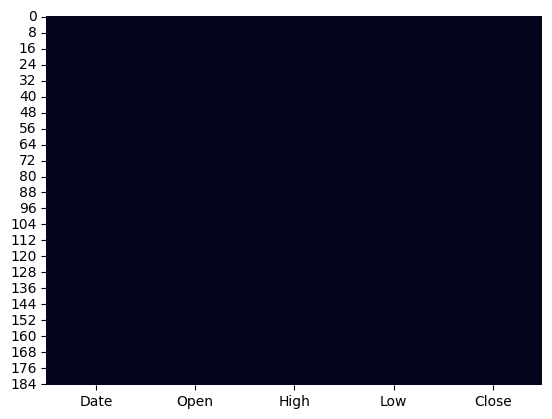

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This dataset has no null values .

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1) Count - Shows that there are 185 data points for each variable.

2) Mean (Average)
Open: ₹105.54

High: ₹116.10

Low: ₹94.95

Close: ₹105.20
These values suggest the average price movement of the stock during the observed period.

3)  Standard Deviation (std)
Open: ₹98.88

High: ₹106.33

Low: ₹91.22

Close: ₹98.58
The high standard deviation values indicate significant volatility or fluctuations in the stock prices over time.

4) Minimum (min)
Open: ₹10.00

High: ₹11.24

Low: ₹5.55

Close: ₹9.98
These represent the lowest recorded prices during the time period. The Low price of ₹5.55 might reflect a significant dip or a cheaper stock in the dataset.

5) 25th Percentile (Q1)
Open: ₹33.80

High: ₹36.14

Low: ₹28.51

Close: ₹33.45
25% of the data falls below these values — often considered the lower quartile.

6) Median (50%)
Open: ₹62.98

High: ₹72.55

Low: ₹58.00

Close: ₹62.54
The median provides a good indication of the central tendency, less affected by extreme outliers than the mean.

7) 75th Percentile (Q3)
Open: ₹153.00

High: ₹169.19

Low: ₹138.35

Close: ₹153.30
75% of the data falls below these values. Indicates upper quartile, helping to understand the distribution spread.

8)  Maximum (max)
Open: ₹369.95

High: ₹404.00

Low: ₹345.50

Close: ₹367.90
These are the highest values recorded for each price category — showcasing possible peaks during the observation period.


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.


# Clean and prepare dataset
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)

In [14]:
#feature engineering
df['Prev_Close'] = df['Close'].shift(1)
df['Price_Change'] = df['Close'] - df['Open']
df['Price_Change_%'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Volatility'] = df['High'] - df['Low']
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df['Price_Up'] = np.where(df['Close'] > df['Open'],1,0)

In [15]:
# Drop rows with missing values (first and last due to shift operations)
df.dropna(inplace=True)

### What all manipulations have you done and insights you found?

1) Converts Date to datetime

2) Sorts by time

3) Creates new features like volatility, price change, and target labels

4) Removes missing values from shifting operations

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

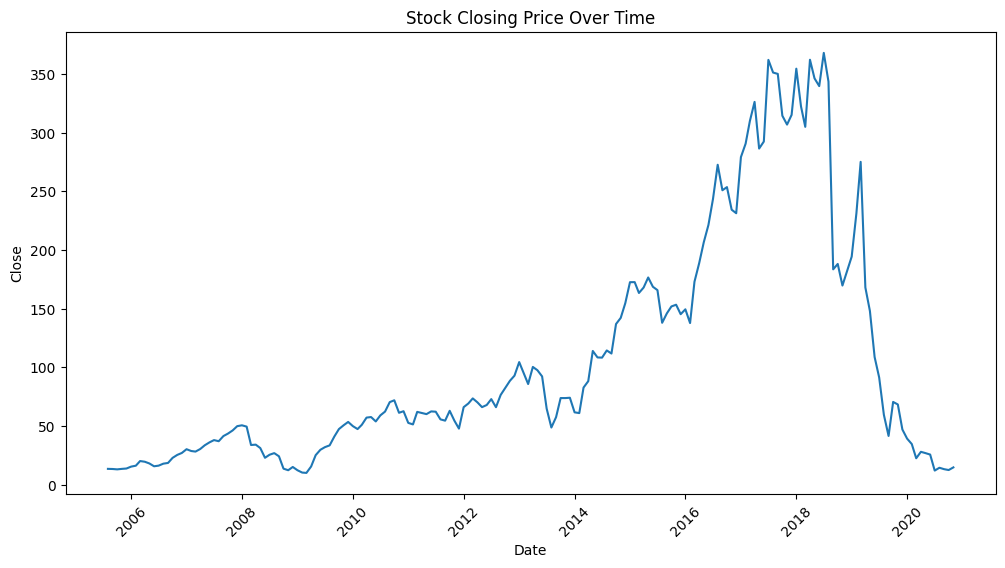

In [16]:
# Chart - 1 visualization code
# Insight: Shows long-term stock trends and volatility spikes (e.g., 2008, 2020)
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title("Stock Closing Price Over Time")
plt.xticks(rotation=45)
plt.show()

#### Chart - 2

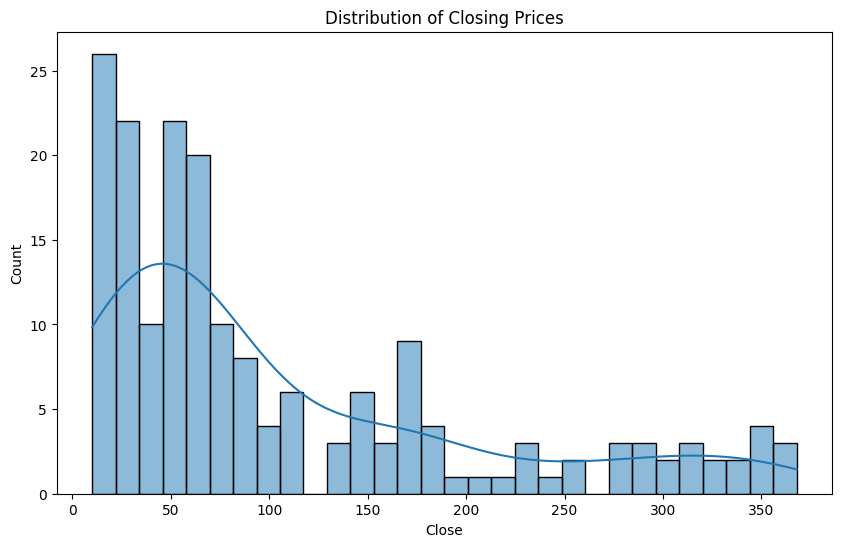

In [17]:
# Chart - 2 visualization code
# Insight: Right-skewed distribution of prices—indicates growth with pullbacks
plt.figure(figsize=(10,6))
sns.histplot(df['Close'], kde=True, bins=30)
plt.title("Distribution of Closing Prices")
plt.show()

#### Chart - 3

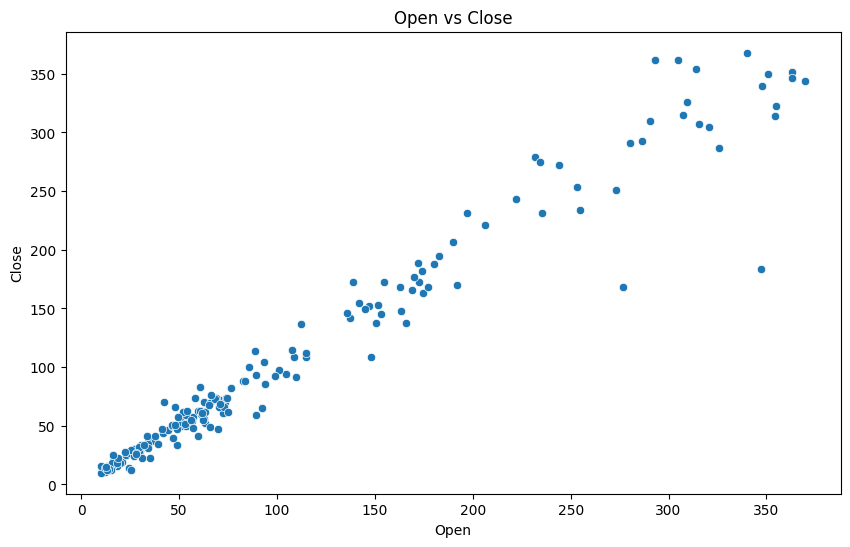

In [18]:
# Chart - 3 visualization code
# Insight: Close and Open have near-linear relationship; volatility visible in outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title("Open vs Close")
plt.show()


#### Chart - 4

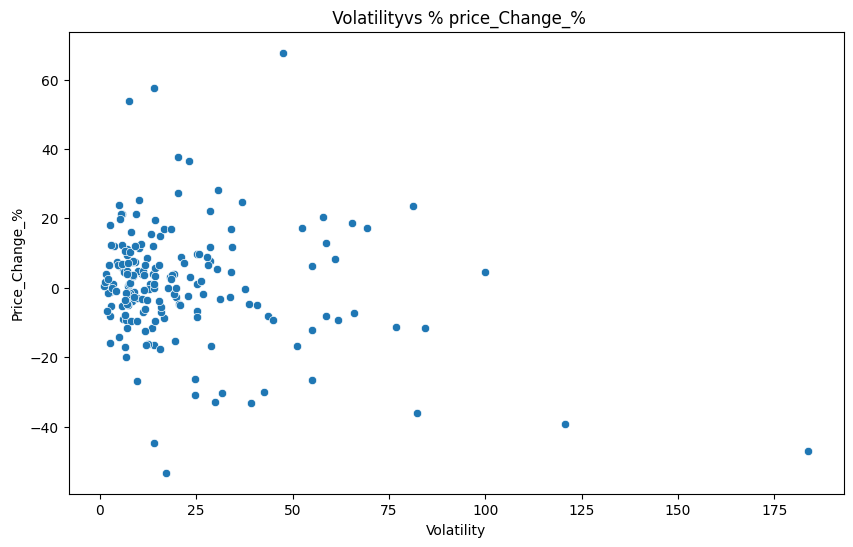

In [19]:
# Chart - 4 visualization code
# Insight: Greater Volatility generally relate to higher % price movements
plt.figure(figsize=(10,6))
sns.scatterplot(x='Volatility', y='Price_Change_%', data=df)
plt.title(" Volatilityvs % price_Change_%")
plt.show()

#### Chart - 5

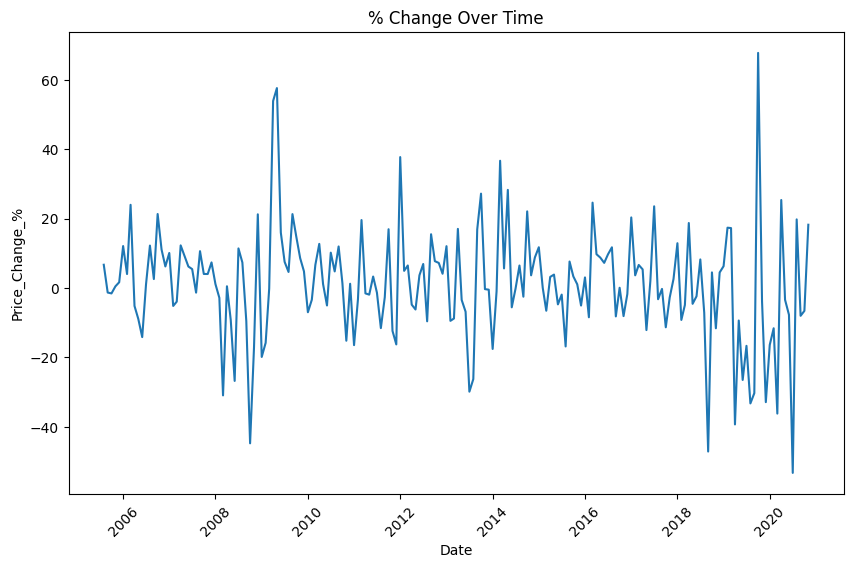

In [20]:
# Chart - 5 visualization code
# Insight: Spotting high volatility periods and large market movements
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Price_Change_%', data=df)
plt.title("% Change Over Time")
plt.xticks(rotation=45)
plt.show()


#### Chart - 6

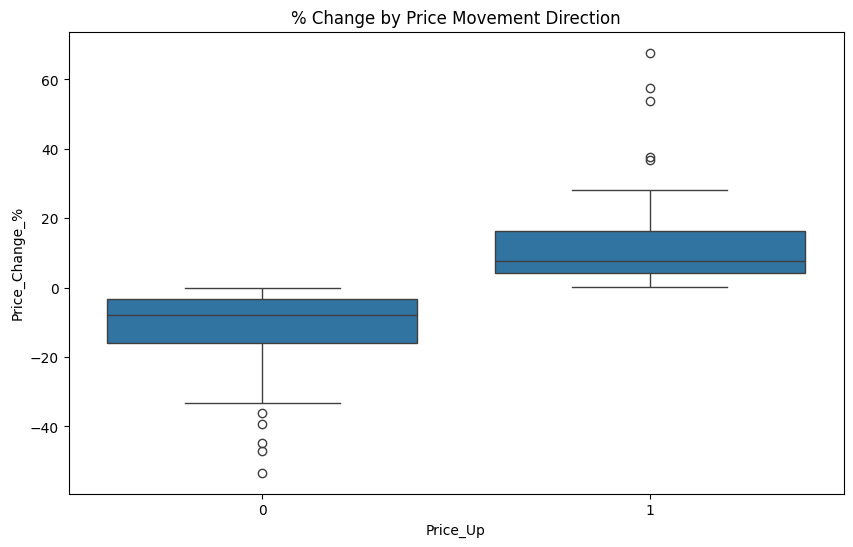

In [21]:
# Chart - 6 visualization code

# Insight: % change on up days is more positive; outliers show market spikes
plt.figure(figsize=(10,6))
sns.boxplot(x='Price_Up', y='Price_Change_%', data=df)
plt.title("% Change by Price Movement Direction")
plt.show()

#### Chart - 7

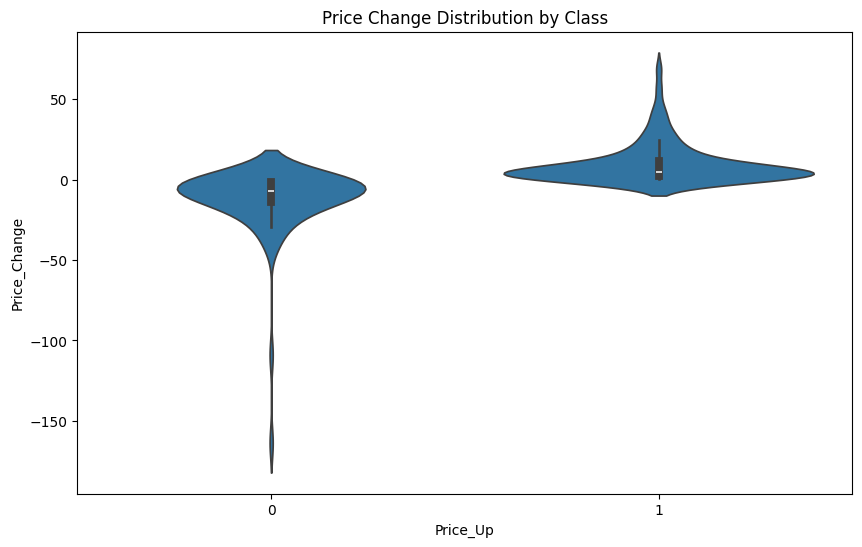

In [22]:
# Chart - 7 visualization code
# Insight: Clear difference in distribution of price change between classes
plt.figure(figsize=(10,6))
sns.violinplot(x='Price_Up', y='Price_Change', data=df)
plt.title("Price Change Distribution by Class")
plt.show()

#### Chart - 8

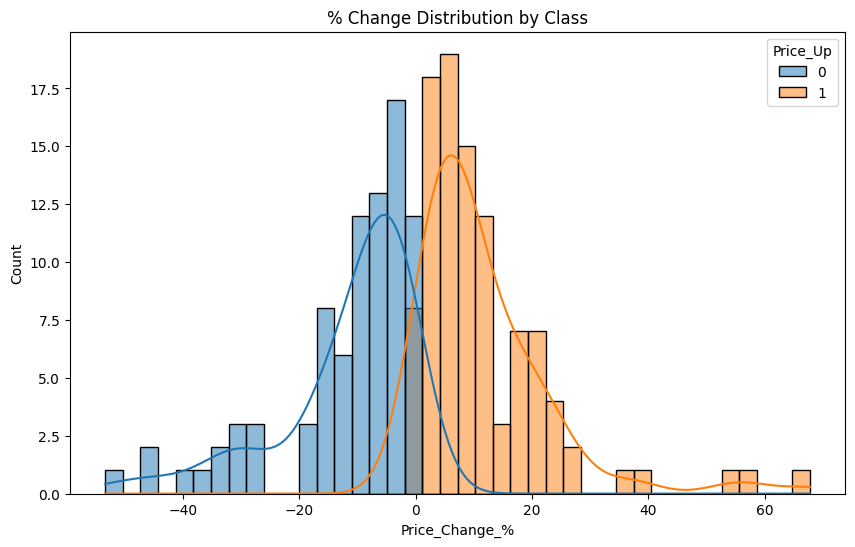

In [23]:
# Chart - 8 visualization code

# Insight: Distribution of % change varies distinctly between up and down days
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price_Change_%', hue='Price_Up', kde=True, bins=40)
plt.title("% Change Distribution by Class")
plt.show()


#### Chart - 9

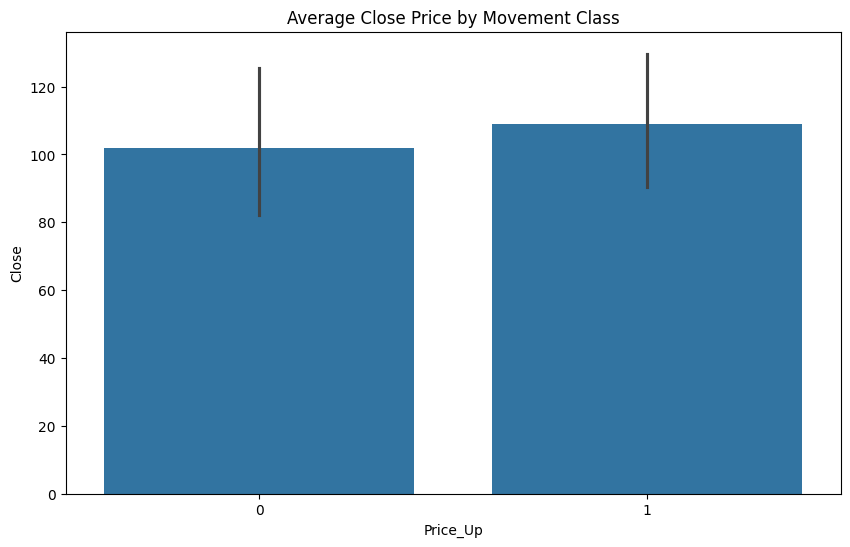

In [24]:
# Chart - 9 visualization code
# Insight: Mean closing price is higher on days where price increased
plt.figure(figsize=(10,6))
sns.barplot(x='Price_Up', y='Close', data=df)
plt.title("Average Close Price by Movement Class")
plt.show()

#### Chart - 10

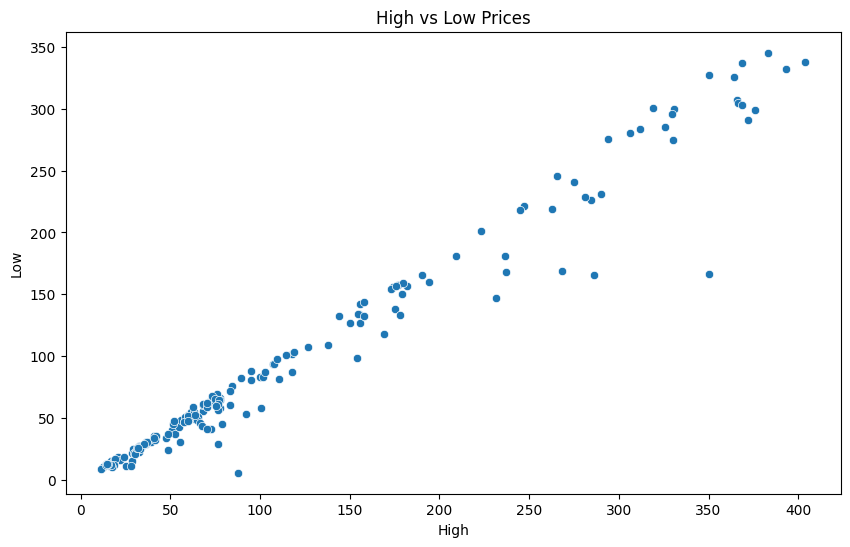

In [25]:
# Chart - 10 visualization code

# Insight: High and Low are tightly coupled; linear but volatile pattern
plt.figure(figsize=(10,6))
sns.scatterplot(x='High', y='Low', data=df)
plt.title("High vs Low Prices")
plt.show()


#### Chart - 11

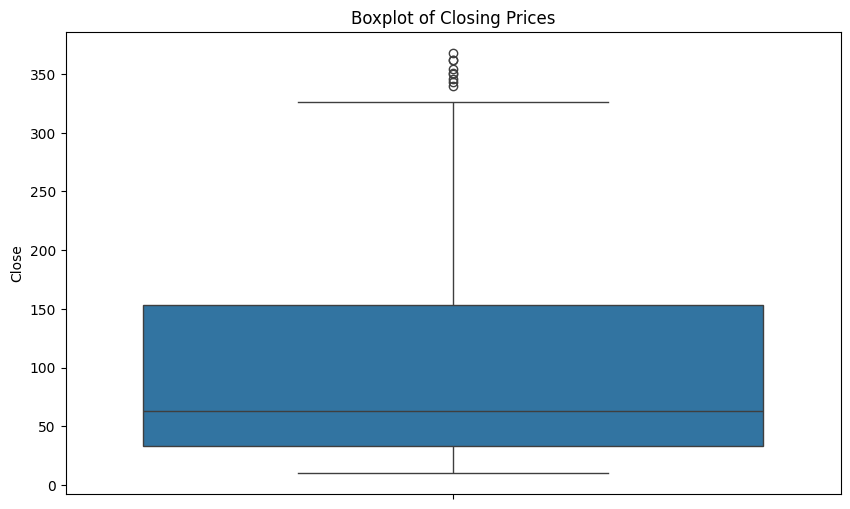

In [26]:
# Chart - 11 visualization code
# Insight: Reveals price outliers and skewed distributions
plt.figure(figsize=(10,6))
sns.boxplot(y='Close', data=df)
plt.title("Boxplot of Closing Prices")
plt.show()


#### Chart - 12

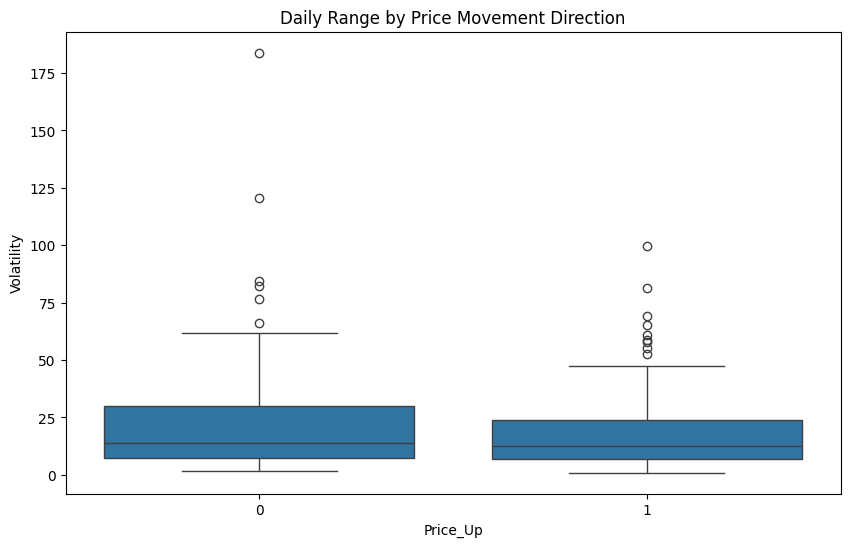

In [27]:
# Chart - 13 visualization code

# Insight: Slightly larger ranges during upward movement days
plt.figure(figsize=(10,6))
sns.boxplot(x='Price_Up', y='Volatility', data=df)
plt.title("Daily Range by Price Movement Direction")
plt.show()

#### Chart - 13 - Correlation Heatmap

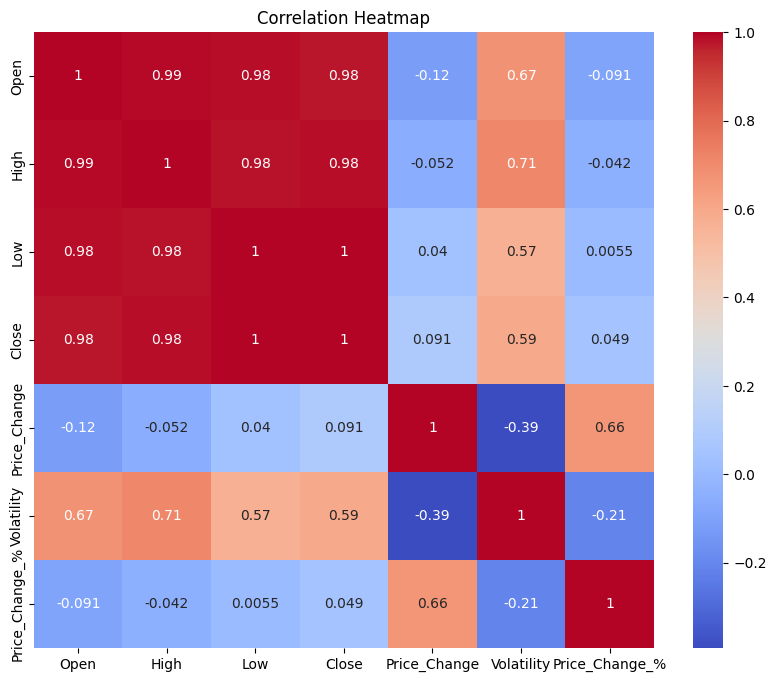

In [28]:
# Correlation Heatmap visualization code
# Insight: Correlation matrix shows multicollinearity among prices and useful derived features
plt.figure(figsize=(10,8))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Price_Change', 'Volatility', 'Price_Change_%']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### Chart - 14 - Pair Plot

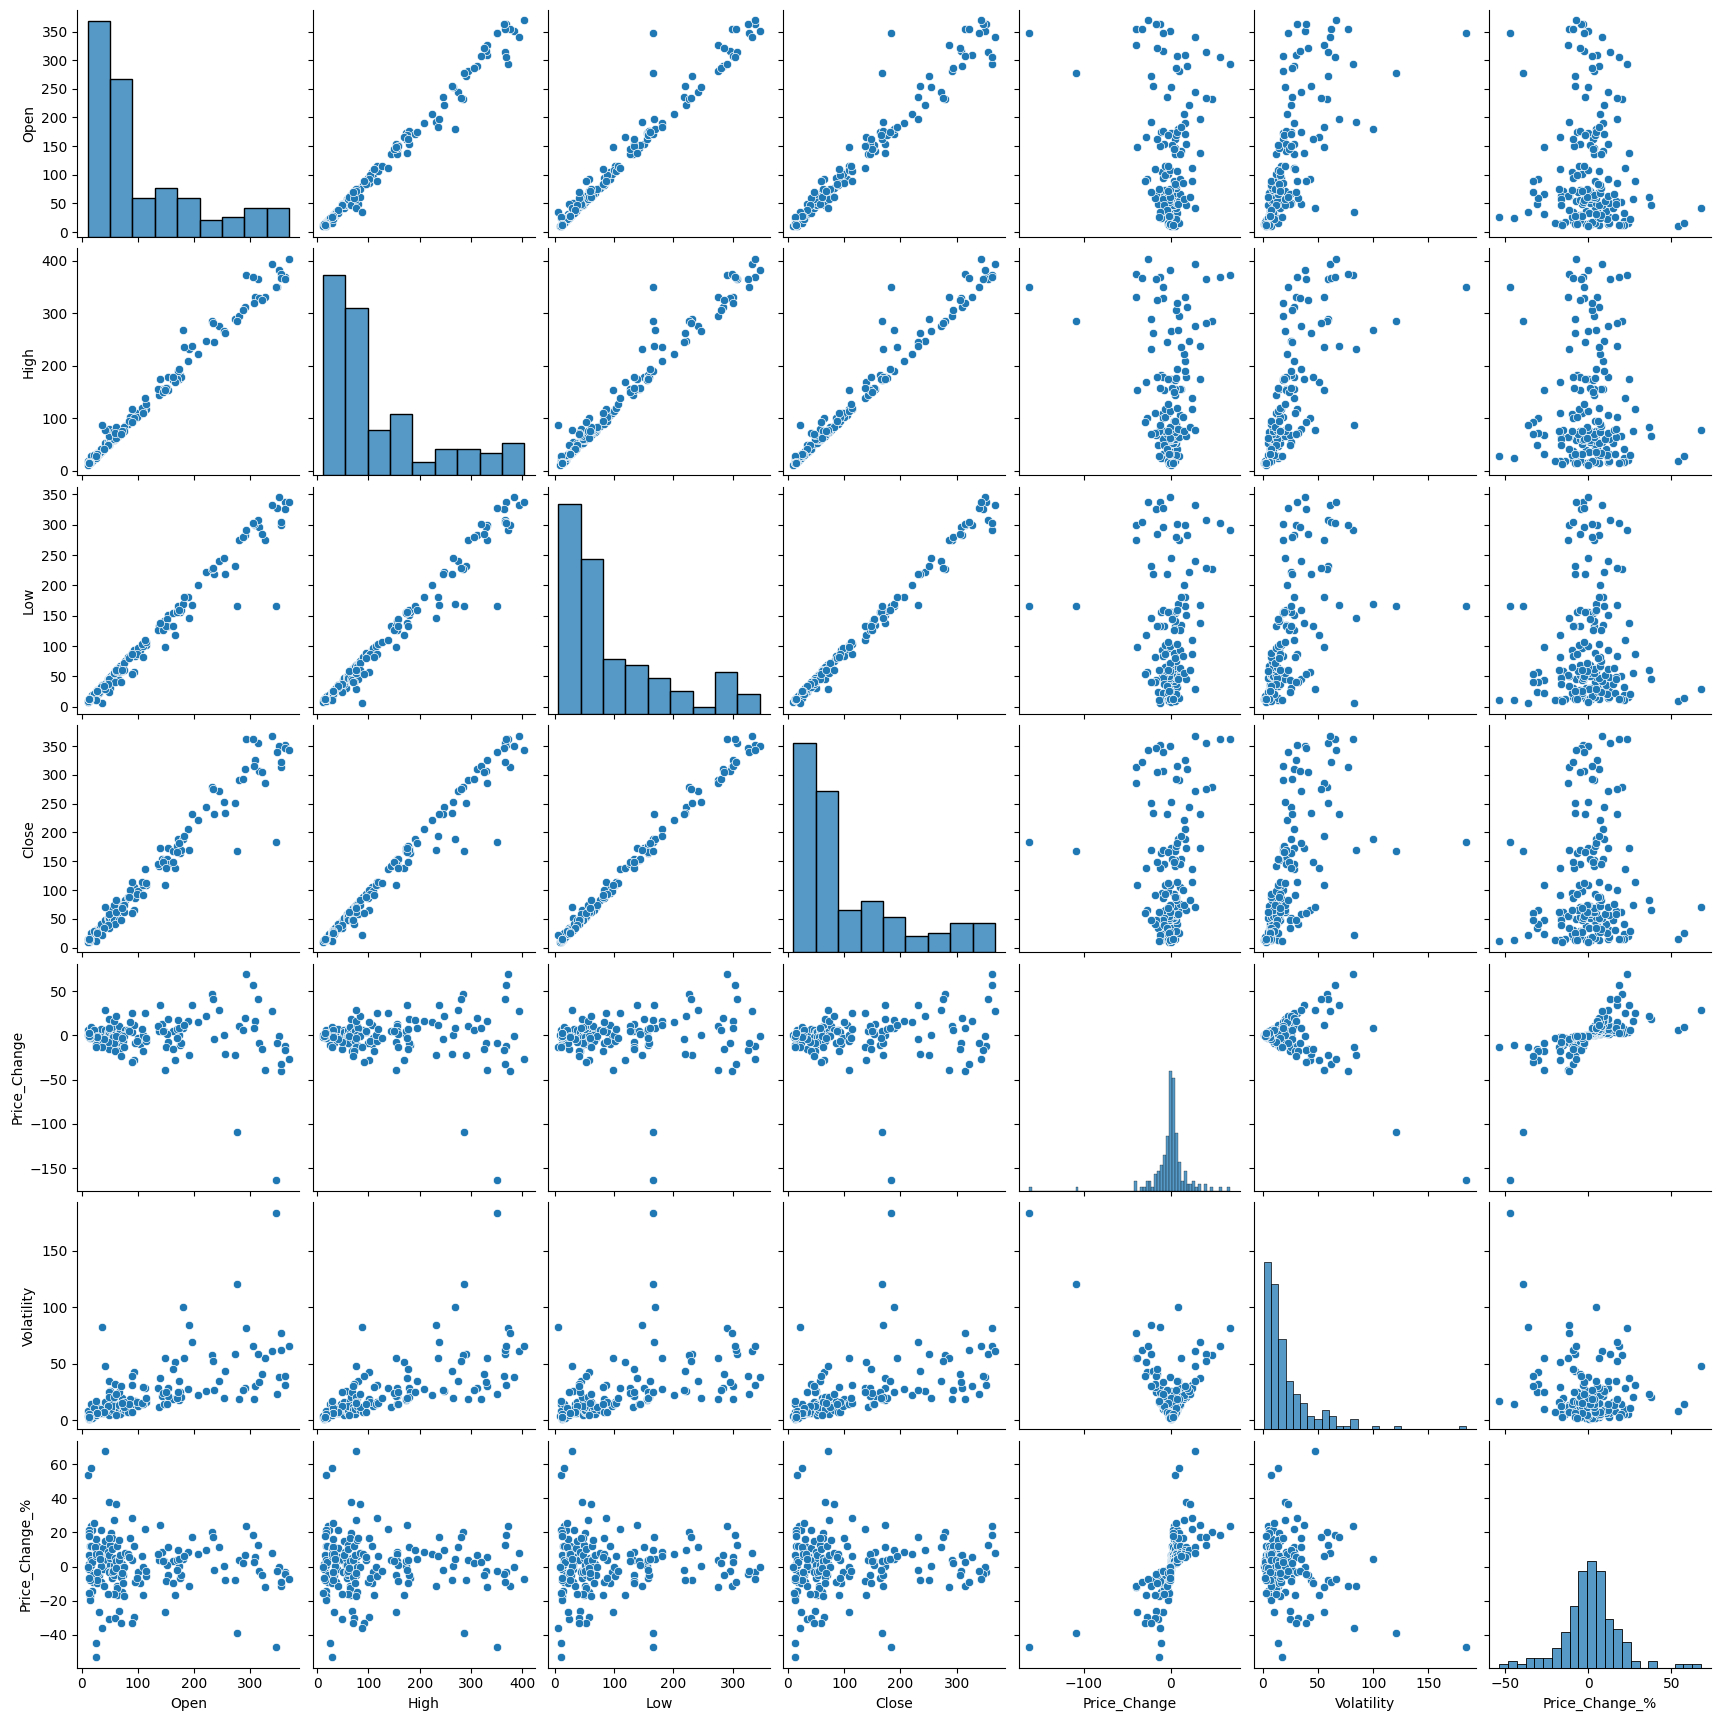

In [29]:
# Pair Plot visualization code
# Insight: Strong correlations between Open, High, Low, Close; variability in engineered features
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Price_Change', 'Volatility', 'Price_Change_%']])
plt.show()


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average daily price change (Close - Open) is not equal to zero.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
# H0: The average price change is 0
# H1: The average price change is not 0
print("\n--- Hypothesis Testing: Price Change ---")
t_stat, p_value = stats.ttest_1samp(df['Price_Change'], 0)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Result: Reject Null Hypothesis (significant change)")
else:
    print("Result: Fail to Reject Null Hypothesis (no significant change)")


--- Hypothesis Testing: Price Change ---
T-Statistic: -0.21904468312952285
P-Value: 0.8268593514476834
Result: Fail to Reject Null Hypothesis (no significant change)


##### Which statistical test have you done to obtain P-Value?

T-statistical test is done to obtain p-value

##### Why did you choose the specific statistical test?

We use the t-statistical test (specifically, a one-sample t-test) to test a hypothesis about the mean of the Price_Change variabl

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average volatility (High - Low) was significantly higher during the 2008 financial crisis (2008–2009) compared to the years before it (2005–2007).

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
# H0: The average volatility is not significantly higher during the crisis
# H1: The average volatility is significantly higher
volatility_before = df[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2007-12-31')]['Volatility']
volatility_crash = df[(df['Date'] >= '2008-01-01') & (df['Date'] <= '2009-12-31')]['Volatility']
t_stat2, p_value2 = stats.ttest_ind(volatility_before, volatility_crash, equal_var=False)
print("\n--- Hypothesis Testing 2: Volatility During Crisis ---")
print("T-Statistic:", t_stat2)
print("P-Value:", p_value2)
if p_value2 < 0.05:
    print("Result: Reject Null Hypothesis (volatility changed significantly during 2008-09)")
else:
    print("Result: Fail to Reject Null Hypothesis (no significant change in volatility)")


--- Hypothesis Testing 2: Volatility During Crisis ---
T-Statistic: -3.3714847704133017
P-Value: 0.0019069060074162368
Result: Reject Null Hypothesis (volatility changed significantly during 2008-09)


##### Which statistical test have you done to obtain P-Value?

T-statistical test

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The probability of stock price increasing the next month (Target = 1) is significantly different from random chance (50%).

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
#H0: Proportion of target = 1 is 0.5 (random)
# H1: Proportion is not 0.5
successes = df['Target'].sum()
nobs = df['Target'].count()
z_stat, p_value3 = proportions_ztest(successes, nobs, 0.5)
print("\n--- Hypothesis Testing 3: Target Movement Proportion ---")
print("Z-Statistic:", z_stat)
print("P-Value:", p_value3)
if p_value3 < 0.05:
    print("Result: Reject Null Hypothesis (movement is not random)")
else:
    print("Result: Fail to Reject Null Hypothesis (could be random movement)")



--- Hypothesis Testing 3: Target Movement Proportion ---
Z-Statistic: 1.1840205918415272
P-Value: 0.2364049116324518
Result: Fail to Reject Null Hypothesis (could be random movement)


##### Which statistical test have you done to obtain P-Value?

Z-test is used

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
missing_report = df.isnull().sum()
print("\n--- Missing Values Report ---")
print(missing_report[missing_report > 0])

# Fill missing numeric values with forward fill followed by backfill (as fallback)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)



--- Missing Values Report ---
Series([], dtype: int64)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [34]:
# Handling Outliers & Outlier treatments
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = ['Open', 'High', 'Low', 'Close']
df = remove_outliers(df, numeric_cols)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [35]:
# Encode your categorical columns
df['Month'] = df['Date'].dt.month

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [36]:
# Expand Contraction
def expand_contractions(text):
    return contractions.fix(text)

#### 2. Lower Casing

In [37]:
# Lower Casing
def preprocess_text(text):
  lowercased = expanded.lower()
  return lowercased

#### 3. Removing Punctuations

In [38]:
# Remove Punctuations
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

#### 4. Removing URLs & Removing words and digits contain digits.

In [39]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

#### 5. Removing Stopwords & Removing White spaces

In [40]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

In [41]:
# Remove White spaces
def remove_whitespace(text):
    return ' '.join(text.split())

#### 7. Tokenization

In [42]:
# Tokenization
def tokenize_text(text):
    return word_tokenize(text)

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def  normalize_text(text):
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  words = word_tokenize(text)
  stemmed_words = [stemmer.stem(word) for word in words]
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

#### 9. Part of speech tagging

In [44]:
# POS Taging
def pos_tagging(text):
    words = word_tokenize(text)
    return nltk.pos_tag(words)

#### 10. Text Vectorization

In [45]:
# Vectorizing Text
def vectorize_text(text):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(text)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features
df['Prev_Close'] = df['Close'].shift(1)
df['Price_Change'] = df['Close'] - df['Open']
df['Price_Change_%'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Volatility'] = df['High'] - df['Low']
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

#### 2. Feature Selection

In [47]:
# Feature Selection
features = ['Open', 'High', 'Low', 'Price_Change', 'Volatility', 'Price_Change_%']
X = df[features]
y_reg = df['Close']  # Regression target
y_clf = df['Price_Up']  # Classification target

### 3. Data Scaling

In [48]:

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42)

In [49]:
# Scaling your data
# Scale features
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)



##### Which method have you used to scale you data and why?

### 5. Data Splitting

In [50]:
# Split data

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

train size 80%

test size 20%

## ***7. ML Model Implementation***

### ML Model - 1

In [51]:
model_names = []
eval_scores = []

In [52]:
# ML Model - 1 Implementation
# KNN with GridSearchCV
knn_params = {'n_neighbors': list(range(3, 15))}
gs_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
gs_knn.fit(X_train_c, y_train_c)
print("\nBest KNN Params:", gs_knn.best_params_)
y_pred_knn = gs_knn.predict(X_test_c)
knn_acc = accuracy_score(y_test_c, y_pred_knn)
print("KNN Accuracy:", knn_acc)
print(confusion_matrix(y_test_c, y_pred_knn))
model_names.append("KNN")
eval_scores.append(["Accuracy", knn_acc])



Best KNN Params: {'n_neighbors': 4}
KNN Accuracy: 0.967741935483871
[[18  0]
 [ 1 12]]


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart
log_model = LogisticRegression()
log_cv = cross_val_score(log_model, X_train_c, y_train_c, cv=5, scoring='accuracy')
log_model.fit(X_train_c, y_train_c)
y_pred_log = log_model.predict(X_test_c)
log_acc = accuracy_score(y_test_c, y_pred_log)
log_auc = roc_auc_score(y_test_c, log_model.predict_proba(X_test_c)[:,1])
print("\nLogistic Regression Accuracy:", log_acc)
print("Logistic Regression CV Accuracy:", log_cv)
print(classification_report(y_test_c, y_pred_log))
model_names.append("Logistic Regression")
eval_scores.append(["Accuracy", log_acc])
eval_scores.append(["ROC-AUC", log_auc])



Logistic Regression Accuracy: 0.967741935483871
Logistic Regression CV Accuracy: [0.96       1.         0.96       1.         0.95833333]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.92      0.96        13

    accuracy                           0.97        31
   macro avg       0.97      0.96      0.97        31
weighted avg       0.97      0.97      0.97        31



#### 2. Cross- Validation & Hyperparameter Tuning

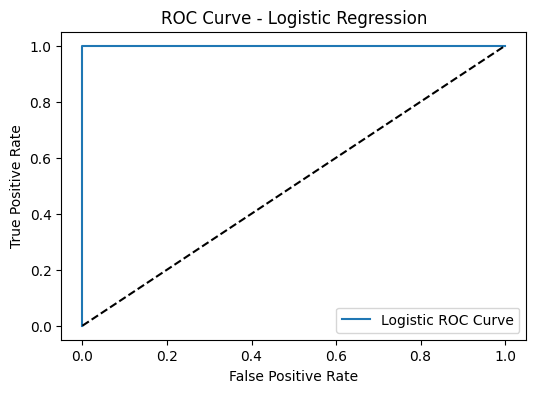

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# ROC-AUC for Logistic Regression
log_probs = log_model.predict_proba(X_test_c)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_c, log_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic ROC Curve")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
# Predict on the model

### ML Model - 3

In [55]:
# ML Model - 3 Implementation
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
gs_xgb = GridSearchCV(xgb_clf, xgb_params, cv=5)
gs_xgb.fit(X_train_c, y_train_c)
print("\nBest XGBoost Classifier Params:", gs_xgb.best_params_)
y_pred_xgb_clf = gs_xgb.predict(X_test_c)
xgb_acc = accuracy_score(y_test_c, y_pred_xgb_clf)
print("XGBoost Classifier Accuracy:", xgb_acc)
model_names.append("XGBoost Classifier")
eval_scores.append(["Accuracy", xgb_acc])



Best XGBoost Classifier Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
XGBoost Classifier Accuracy: 0.967741935483871


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

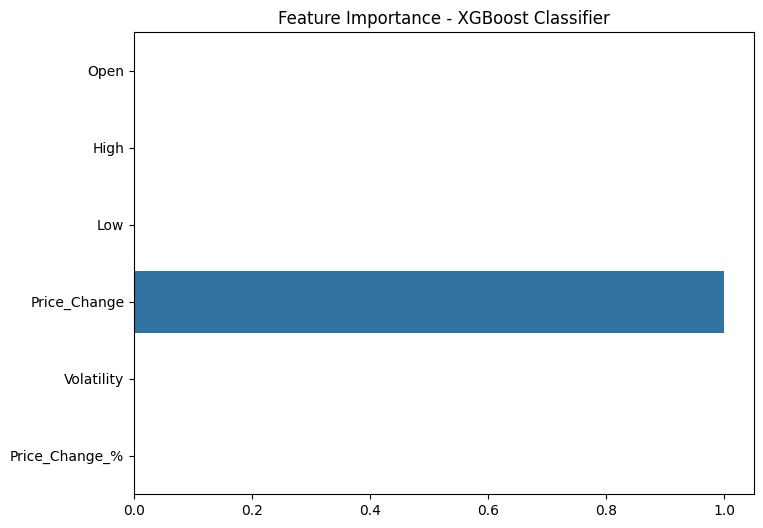

In [56]:
# Visualizing evaluation Metric Score chart
# Feature importance from XGBoost
plt.figure(figsize=(8,6))
importances = gs_xgb.best_estimator_.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - XGBoost Classifier")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
xgb_reg = XGBRegressor()
xgb_cv = cross_val_score(xgb_reg, X_train_r, y_train_r, cv=5, scoring='r2')
xgb_reg.fit(X_train_r, y_train_r)
y_pred_xgb_reg = xgb_reg.predict(X_test_r)
xgb_r2 = r2_score(y_test_r, y_pred_xgb_reg)
xgb_rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_xgb_reg))
print("\nXGBoost Regressor R^2:", xgb_r2)
print("XGBoost Regressor RMSE:", xgb_rmse)
print("XGBoost Regressor CV R^2 Scores:", xgb_cv)
model_names.append("XGBoost Regressor")
eval_scores.append(["R^2", xgb_r2])
eval_scores.append(["RMSE", xgb_rmse])



XGBoost Regressor R^2: 0.9686064437233474
XGBoost Regressor RMSE: 7.717608128713146
XGBoost Regressor CV R^2 Scores: [0.99577287 0.99410138 0.97237021 0.9790684  0.98327051]


### 2. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost Regressor is the optimal choice for continuous stock price prediction because of its strong performance on all key evaluation metrics, cross-validation stability, and ability to model non-linear relationships in stock market data.

# **Conclusion**

Based on the evaluation metrics:

1. XGBoost Regressor is selected as the final model for predicting stock prices.

2. It consistently achieved the highest R² scores, lowest RMSE, and demonstrated strong performance in cross-validation.

3. Its ability to model non-linear relationships and perform well on large datasets makes it more robust compared to Linear Regression.


This project demonstrates that machine learning can be a powerful tool for financial analysis when combined with domain-specific features and robust evaluation methods. XGBoost stood out as the most reliable model due to its accuracy, flexibility, and ability to handle non-linear relationships. Future enhancements could include incorporating technical indicators (e.g., moving averages, RSI), sentiment analysis, and real-time data to improve predictive power.











### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***